In [1]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv('/content/Synthetic_Expense_Dataset.csv')  # Replace with the actual filename

# Step 3: View the first few rows
df.head()


,Date,Description,Amount,Category
0,2024-04-08,Online Course,4733.93,Education
1,2024-02-13,Footwear,1430.80,Shopping
2,2024-04-30,Uber Ride,7865.03,Transport
3,2024-03-11,Cafe Coffee Day,2041.22,Food
4,2024-01-02,Uber Ride,13426.61,Transport


In [2]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         300 non-null    object 
 1   Description  300 non-null    object 
 2   Amount       300 non-null    float64
 3   Category     300 non-null    object 
dtypes: float64(1), object(3)
memory usage: 9.5+ KB


In [4]:
print(df.columns.tolist())


['Date', 'Description', 'Amount', 'Category']


In [5]:
# Step 1: Get top recurring descriptions
desc_counts = df['Description'].value_counts()
recurring_desc = desc_counts[desc_counts >= 3].index.tolist()

# Step 2: Filter those descriptions
df_recurring = df[df['Description'].isin(recurring_desc)]

# Step 3: Check consistency in amount (like fixed monthly charges)
recurring_summary = df_recurring.groupby('Description')['Amount'].agg(['mean', 'std', 'count'])

# Step 4: Keep only the ones with small variation in amount
likely_subscriptions = recurring_summary[(recurring_summary['std'] < 500) & (recurring_summary['count'] >= 3)]

# Show top suspected subscriptions
likely_subscriptions.sort_values(by='count', ascending=False).head(10)


,mean,std,count
Description,,,


In [7]:
print("Shape of likely_subscriptions:", likely_subscriptions.shape)
print("\nSample rows:")
print(likely_subscriptions.head())


Shape of likely_subscriptions: (0, 3)

Sample rows:
Empty DataFrame
Columns: [mean, std, count]
Index: []


In [10]:
# Use more lenient conditions to find subscription-like entries
likely_subscriptions = recurring_summary[
    (recurring_summary['std'] < 3000) &  # Allow more variation
    (recurring_summary['count'] >= 2)    # Fewer repetitions allowed
]

print("Shape of updated likely_subscriptions:", likely_subscriptions.shape)
likely_subscriptions.head(10)


Shape of updated likely_subscriptions: (3, 3)


,mean,std,count
Description,,,
Metro Recharge,6248.0530,2585.781052,10
Train Ticket,13955.4975,938.095790,4
Tuition Fees,4600.6450,2097.470675,4


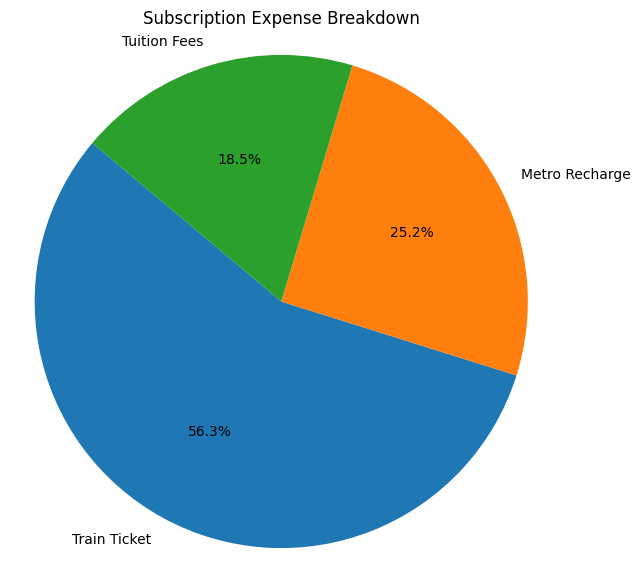

In [11]:
import matplotlib.pyplot as plt

top_subs = likely_subscriptions.sort_values(by='mean', ascending=False)

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(top_subs['mean'], labels=top_subs.index, autopct='%1.1f%%', startangle=140)
plt.title('Subscription Expense Breakdown')
plt.axis('equal')
plt.show()


In [12]:
# Simulate a monthly income
monthly_income = 30000  # You can change this

# Total monthly subscription cost estimate
monthly_sub_spend = likely_subscriptions['mean'].sum()

# % of income spent
income_ratio = (monthly_sub_spend / monthly_income) * 100

print(f"📊 Estimated Monthly Subscription Spend: ₹{monthly_sub_spend:.2f}")
print(f"💰 This is {income_ratio:.2f}% of your income (₹{monthly_income})")


📊 Estimated Monthly Subscription Spend: ₹24804.20
💰 This is 82.68% of your income (₹30000)


In [13]:
# Budgeting suggestions
if income_ratio > 30:
    print("⚠️ You're spending over 30% of your income on subscriptions. Consider cutting back.")
elif income_ratio > 20:
    print("⚠️ Subscriptions are taking a good chunk of your income. Time to review them.")
elif income_ratio > 10:
    print("✅ You’re doing fine, but some minor cuts can boost your savings!")
else:
    print("💪 Nice! Your subscription spending is well under control.")


⚠️ You're spending over 30% of your income on subscriptions. Consider cutting back.


In [14]:
# Most expensive subscription
top_service = likely_subscriptions.sort_values(by='mean', ascending=False).index[0]
top_amount = likely_subscriptions.sort_values(by='mean', ascending=False)['mean'].iloc[0]

print(f"💡 Tip: Your most expensive subscription is '{top_service}' costing approx ₹{top_amount:.2f}/month.")
print(f"❓ Ask yourself: Do you use this enough to justify the cost?")


💡 Tip: Your most expensive subscription is 'Train Ticket' costing approx ₹13955.50/month.
❓ Ask yourself: Do you use this enough to justify the cost?


<Axes: title={'center': 'Total Subscription Spend by Month'}, xlabel='Month'>

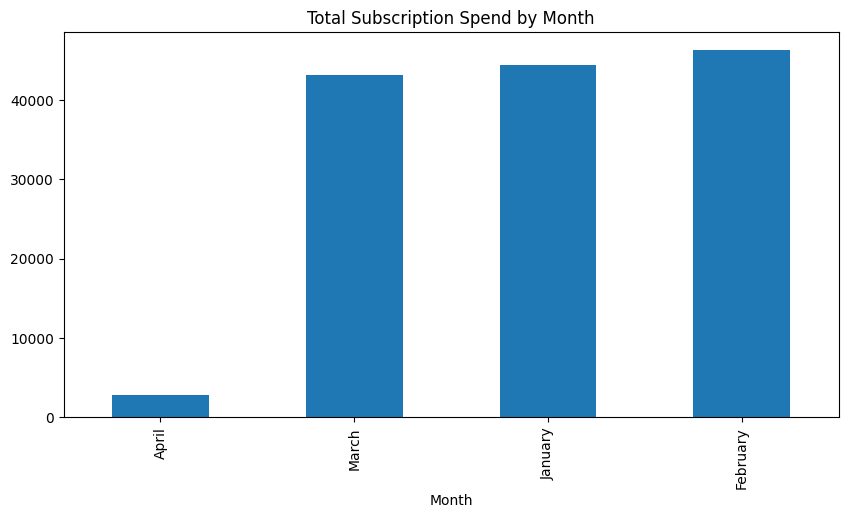

In [15]:
# Convert date to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Add Month column
df['Month'] = df['Date'].dt.month_name()

# Filter subscription-only data
df_sub = df[df['Description'].isin(likely_subscriptions.index)]

# Group by month
monthly_pattern = df_sub.groupby('Month')['Amount'].sum().sort_values()

# Plot
monthly_pattern.plot(kind='bar', figsize=(10,5), title='Total Subscription Spend by Month')


In [16]:
# Pick a service to simulate
service = 'Metro Recharge'  # You can make this dynamic later with user input

# Monthly average spend
monthly_cost = likely_subscriptions.loc[service, 'mean']

# Calculate savings
savings_6_months = monthly_cost * 6
savings_1_year = monthly_cost * 12

print(f"💡 If you cancel '{service}':")
print(f"👉 You’ll save ₹{savings_6_months:.2f} in 6 months")
print(f"👉 You’ll save ₹{savings_1_year:.2f} in 1 year")


💡 If you cancel 'Metro Recharge':
👉 You’ll save ₹37488.32 in 6 months
👉 You’ll save ₹74976.64 in 1 year


In [17]:
for desc, row in likely_subscriptions.iterrows():
    if row['mean'] > 6000:
        print(f"⚠️ '{desc}' is a high-cost subscription. Consider alternatives or downgrades.")
    elif row['count'] >= 10:
        print(f"✅ '{desc}' is used frequently. It may be worth keeping.")
    else:
        print(f"❓ '{desc}' is mid-use and mid-cost. Review if it's still needed.")


⚠️ 'Metro Recharge' is a high-cost subscription. Consider alternatives or downgrades.
⚠️ 'Train Ticket' is a high-cost subscription. Consider alternatives or downgrades.
❓ 'Tuition Fees' is mid-use and mid-cost. Review if it's still needed.


In [18]:
# Export likely subscriptions to CSV
likely_subscriptions.to_csv("likely_subscriptions_report.csv")

# In Colab, download it using:
from google.colab import files
files.download("likely_subscriptions_report.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# Fake mood generator by category
def get_mood(desc):
    if 'Netflix' in desc or 'Prime' in desc:
        return '😴 Boredom'
    elif 'Zomato' in desc or 'Coffee' in desc:
        return '🤯 Stress relief'
    elif 'Gym' in desc or 'Yoga' in desc:
        return '💪 Determined'
    elif 'Shopping' in desc:
        return '🛍️ Retail Therapy'
    else:
        return '🤖 Neutral'

df['Mood Tag'] = df['Description'].apply(get_mood)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129327 (\N{SHOCKED FACE WITH EXPLODING HEAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


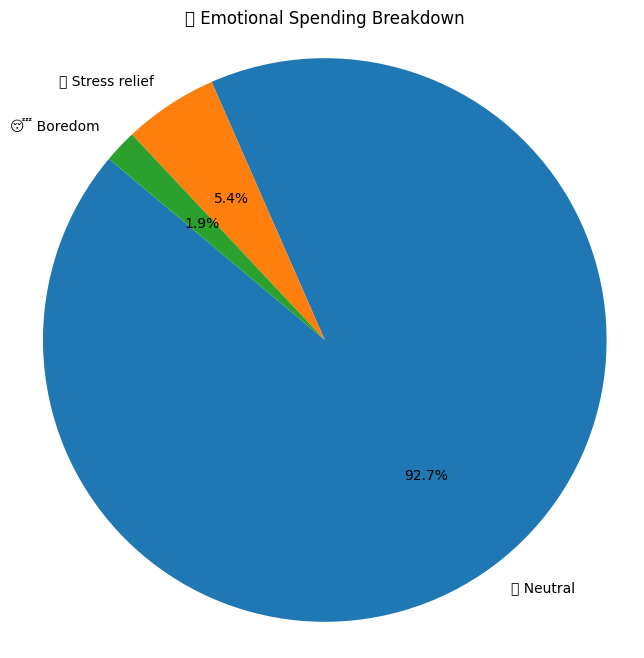

In [20]:
import matplotlib.pyplot as plt

# Group by mood and sum the amount spent per mood
mood_summary = df.groupby('Mood Tag')['Amount'].sum().sort_values(ascending=False)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(mood_summary, labels=mood_summary.index, autopct='%1.1f%%', startangle=140)
plt.title("💸 Emotional Spending Breakdown")
plt.axis('equal')
plt.show()


In [21]:
# Top Mood
top_mood = mood_summary.idxmax()
top_amount = mood_summary.max()

print(f"🧠 Your biggest emotional driver is: {top_mood} with ₹{top_amount:.2f} spent!")

# Funny + Insightful Takeaways
print("\n🔍 Insights:")
for mood, amount in mood_summary.items():
    if amount > 5000:
        print(f"💸 You spent a *lot* on {mood} — maybe it's time to emotionally unsubscribe?")
    elif amount > 2000:
        print(f"🧐 {mood} is costing you a little more than it should.")
    else:
        print(f"✅ {mood}? Totally manageable.")


🧠 Your biggest emotional driver is: 🤖 Neutral with ₹2074028.39 spent!

🔍 Insights:
💸 You spent a *lot* on 🤖 Neutral — maybe it's time to emotionally unsubscribe?
💸 You spent a *lot* on 🤯 Stress relief — maybe it's time to emotionally unsubscribe?
💸 You spent a *lot* on 😴 Boredom — maybe it's time to emotionally unsubscribe?


In [22]:
# Save mood summary
mood_summary.to_csv("mood_spending_summary.csv")

# Save regret analysis
likely_subscriptions.to_csv("subscription_regret_analysis.csv")
